In [242]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.optimize import brentq
from scipy.stats import rv_discrete
from collections import Counter

In [137]:
def convert_odds_to_prob(type, odds):
    if type == "american":
        if odds < 0:
            return (-odds / (-odds + 100)) * 100
        else:
            return (100 / (odds + 100)) * 100

def no_vig_odds(team_a, team_b):
    prob_a = convert_odds_to_prob("american", team_a)
    prob_b = convert_odds_to_prob("american", team_b)
    total = prob_a + prob_b
    return prob_a/total * 100, prob_b/total * 100, total-100


In [138]:
print(no_vig_odds(168,-208))


(35.58883342577187, 64.41116657422813, 4.845900368288426)


In [139]:
def prob_outcome(differential, p):
    #assuming that A vs B and the differential is score A - score B with team A having winning probability p.
    if differential == 0:
       return 0
    elif differential == 1 or differential == -1:
        return (binom.pmf(k = 12, n = 24, p = 1-p)) / 2
    elif 0 < differential <= 13:
        return binom.pmf(k = 13 - differential, n= 2*13 - differential - 1, p=1-p) * p
    elif -13 <= differential < 0:
        return binom.pmf(k  = 13 + differential, n = 2*13 + differential - 1, p=p) * (1-p)
    else:
        return 0
#11-13

In [140]:
class round_diff_distro(rv_discrete):
    def set_p(self, p):
        self.p = p

    def _pmf(self, x):
        x_arr = np.asarray(x)
        flag = isinstance(x, np.ndarray) or isinstance(x, list)
        pmf_output = np.array([prob_outcome(k, self.p) for k in x_arr])
        return pmf_output if flag else pmf_output.item()
    
    def pmf_dict(self):
        return {k: prob_outcome(k, self.p) for k in range(-13,14)}

In [141]:
dict = {k :prob_outcome(k, 0.5) for k in range(-13,14)}
dict.get(-12,0)

0.0007934570312500008

In [142]:
diff_dist = round_diff_distro(a = -13, b = 13, name="game")
diff_dist.set_p(0.6)
outcomes = list(range(-13,14))
print(outcomes)
np.sum(diff_dist.pmf(outcomes))

[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


1.0

In [143]:
dist.pmf_dict()

NameError: name 'dist' is not defined

In [144]:
print(prob_outcome(-5, 0.5))

0.06006717681884772


In [145]:
def plot_round_diff_distro(p):
    distro = round_diff_distro(a = -13, b = 13, name="game")
    distro.set_p(p)
    plt.bar(distro.pmf_dict().keys(), distro.pmf_dict().values())
    return distro.pmf_dict().values()



In [146]:
class total_round_distro(rv_discrete):
    def set_p(self, p):
        self.p = p

    def _pmf(self, x):
        #support from 13 to 25
        x_arr = np.asarray(x)
        pmf_output = np.array([prob_outcome(26 - tot, self.p) + prob_outcome(tot - 26, self.p) for tot in x_arr])
        #print(pmf_output)
        flag = isinstance(x, np.ndarray) or isinstance(x, list)
        return pmf_output if flag else pmf_output.item()
    


In [147]:
def plot_total_round_distro(p):
    total_dist = total_round_distro(a = 13, b = 25, name="total")
    total_dist.set_p(p)
    support = list(range(13,26))
    plt.bar(support, total_dist.pmf(support))
    return total_dist.pmf(support)

In [148]:
total_dist = total_round_distro(a = 13, b = 25, name="total")
total_dist.set_p(0.6)
support = list(range(13,26))


total_dist.pmf(support)
s = np.sum(total_dist.pmf(support))
s

1.0000000000000002

In [149]:
np.sum(total_dist.pmf(support))

1.0000000000000002

In [150]:
dist.set_p(0.503)
d = dist.pmf_dict()
for v in range(13,26):
    print(26-v, v-26, d[26 - v], d[v - 26])
   

NameError: name 'dist' is not defined

dict_values([6.710886399999996e-06, 5.2344913919999994e-05, 0.0002198486384640004, 0.0006595459153920011, 0.0015829101969407997, 0.0032291368017592324, 0.005812446243166618, 0.009465983881728465, 0.014198975822592714, 0.019878566151629834, 0.02623970732015135, 0.03291890554709898, 0.04937835832064849, 0, 0.04937835832064849, 0.07406753748097274, 0.08855901220551089, 0.10063524114262612, 0.10782347265281379, 0.10782347265281356, 0.09931109323285464, 0.08275924436071218, 0.06085238555934726, 0.038032740974591965, 0.019016370487296017, 0.006791560888319997, 0.0013060694015999915])

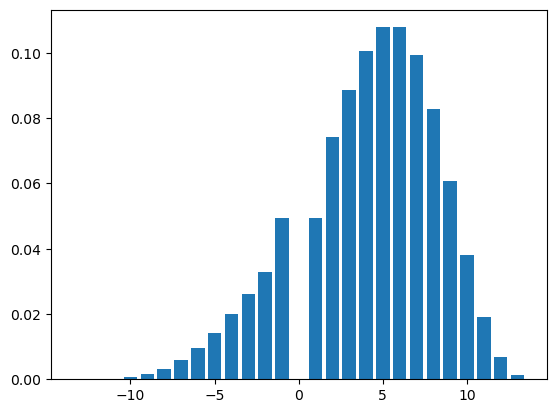

In [151]:
plot_round_diff_distro(0.6)

array([0.00131278, 0.00684391, 0.01923622, 0.03869229, 0.0624353 ,
       0.08598838, 0.10512354, 0.11728946, 0.12202245, 0.12051381,
       0.11479872, 0.10698644, 0.09875672])

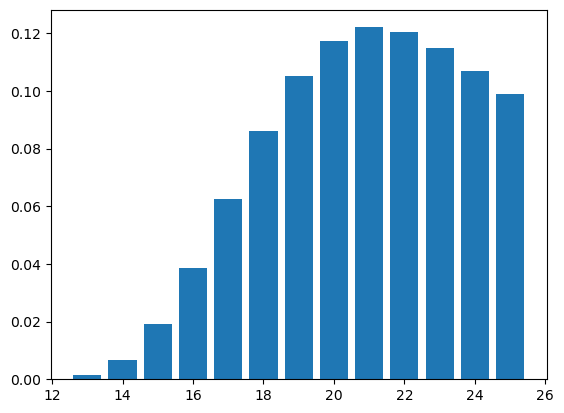

In [152]:
plot_total_round_distro(0.6)

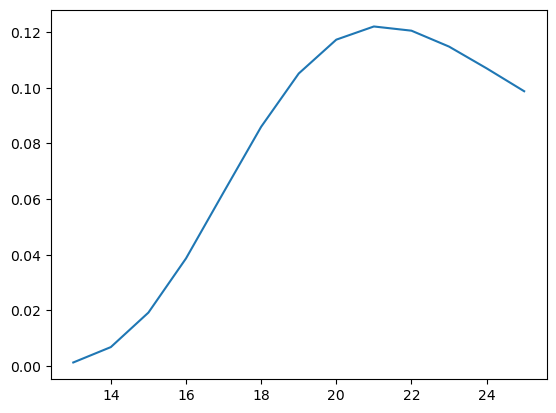

In [153]:
plt.plot(support, total_dist.pmf(support))

In [154]:
def f(total):
    return (26 - total)

f(20)

6

In [155]:
plot_distro(0.6)

NameError: name 'plot_distro' is not defined

In [ ]:
np.sum(distro)

NameError: name 'distro' is not defined

In [156]:
sz = len(distro)
print(distro[:12].size)
print(distro[15:].size)

NameError: name 'distro' is not defined

In [157]:
distro[15:]
total = (distro[:12] + distro[15:][-1])
print(total)
total = np.insert(total, total.size, distro[13])
print(total.size)

NameError: name 'distro' is not defined

In [158]:
plt.plot(total)

NameError: name 'total' is not defined

In [159]:
list(range(24, 12,-1))

[24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13]

In [160]:
def prob_winning(p):
    distro = np.array([prob_outcome(s, p) for s in range(-13,14)])
    return np.sum(distro[14:])

In [161]:
def prob_losing(p):
    distro = np.array([prob_outcome(s, p) for s in range(-13,14)])
    return np.sum(distro[:13])

In [162]:
prob_winning(0.58614)+prob_losing(0.58614)

1.0000000000000004

In [163]:
def objective(p):
    return prob_winning(p) - 0.8

# Solving for p using the Brent method
p_solution = brentq(objective, 0, 1)  # p is a probability, so it ranges from 0 to 1
print(f"The solution for p is approximately: {p_solution}")

The solution for p is approximately: 0.5861447126222543


In [164]:
def solve_p(q):
    def objective(p):
        return prob_winning(p) - q
    p_solution = brentq(objective, 0, 1)
    return p_solution


In [165]:
prob_winning(p_solution)

0.8000000000000002

In [166]:
solve_p(0.7)

0.5539233189114676

In [234]:
def main(odds1, odds2):
    r, s, vig = no_vig_odds(odds1, odds2)
    q = max(r, s) * 0.01
    p_sol = solve_p(q)
    plot_round_diff_distro(p_sol)
    plot_total_round_distro(p_sol)
    diff_dist.set_p(p_sol)
    total_dist.set_p(p_sol)
    return r,s,vig, p_sol, diff_dist.mean(), diff_dist.median(), total_dist.mean(), total_dist.median()

(64.99999999996501,
 35.000000000034994,
 1.4210854715202004e-14,
 0.5396753883866506,
 1.7165549406990446,
 2.0,
 21.781905440178512,
 22.0)

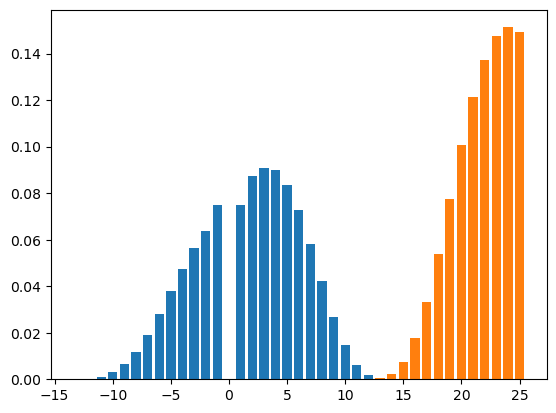

In [247]:
main(-185.714285714, +185.714285714)

(46.997389033942554,
 53.00261096605744,
 4.81663929939792,
 0.5077689140588397,
 0.33876258872631815,
 1.0,
 21.963155433628323,
 22.0)

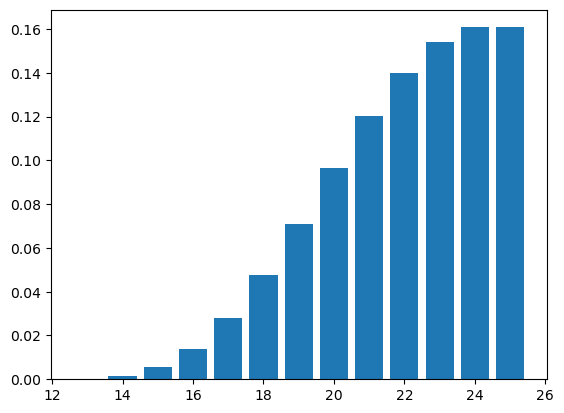

In [169]:
main(103, -125)

In [170]:
print(a,b,c,p_test)

NameError: name 'a' is not defined

In [171]:
plot_round_diff_distro(p_test)

NameError: name 'p_test' is not defined

In [172]:
plot_total_round_distro(p_test)

NameError: name 'p_test' is not defined

In [173]:
diff_dist.set_p(p_test)
diff_dist.mean()
diff_dist.median()

NameError: name 'p_test' is not defined

In [174]:
total_dist.set_p(p_test)
total_dist.mean()

NameError: name 'p_test' is not defined

In [175]:
total_dist.median()

22.0

In [192]:
from numba import jit

@jit(nopython=True)
def simulate_game_outcome(base_p: float, eps: float) -> int:
    team_a = 0
    team_b = 0
    prev_round_winner = None
    
    while (team_a < 13 and team_b < 13 and team_a + team_b < 24):
        uniform = np.random.uniform(0, 1)

        if team_a + team_b == 12:
            prev_round_winner = None

        if prev_round_winner is None:
            p = base_p
        elif prev_round_winner == 'a':
            p = base_p * (1 + eps)
        elif prev_round_winner == 'b':
            p = base_p - eps + base_p * eps

        if uniform < p:
            team_a += 1
            prev_round_winner = 'a'
        else:
            team_b += 1
            prev_round_winner = 'b'

    return team_a - team_b
            
        
        


In [193]:
simulate_game_outcome(0.5, 0)

-2

In [240]:
def bootstrap(base_p: float, eps: float, num_iters: int = 1_000_000, plotting: bool = False):
    res = []
    for _ in range(num_iters):
        outcome = simulate_game_outcome(base_p, eps)
        res.append(np.random.choice([-1, 1]) if outcome == 0 else outcome)

    if plotting:
        pmf_dict = Counter(res)
        plt.bar(pmf_dict.keys(), pmf_dict.values())
    res = np.array(res)

    proportion_won = np.mean(res > 0)
    
    return proportion_won
    




0.930794

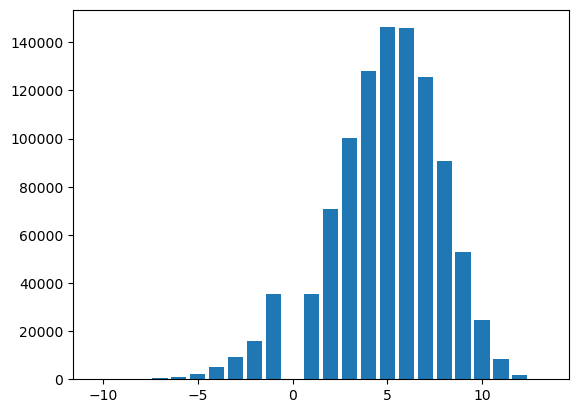

In [255]:
bootstrap(0.7, -0.3, plotting=True)

dict_values([1.5943230000000037e-07, 1.450833930000004e-06, 7.109086257000003e-06, 2.488180189950007e-05, 6.966904531860014e-05, 0.0001658123278582683, 0.0003482058885023636, 0.0006615911881544903, 0.0011577845792703559, 0.0018910481461415839, 0.002912214145058046, 0.004262422521403126, 0.0099456525499406, 0, 0.0099456525499406, 0.02320652261652808, 0.0369959056205522, 0.05605440245538203, 0.08007771779340278, 0.1067702903912038, 0.13112140925235538, 0.14569045472483938, 0.14283377914199968, 0.11902814928499948, 0.0793520995233329, 0.037786714058730006, 0.009688901040699995])

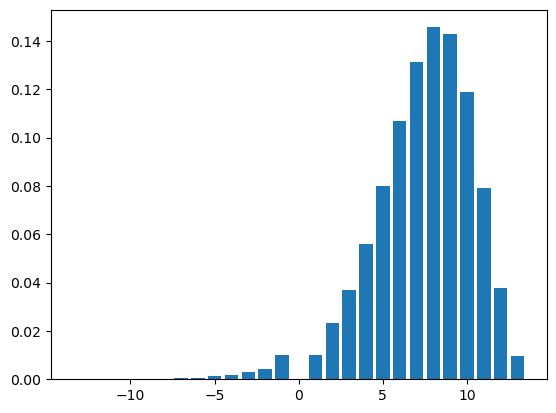

In [253]:
plot_round_diff_distro(0.7)

In [248]:
def solve_simulated_p(q):
    def objective(p):
        return bootstrap(p, 0.1) - q
    p_solution = brentq(objective, 0, 1)
    return p_solution

In [228]:
print(solve_simulated_p(0.6))

0.5248205646673122


In [230]:
print(solve_simulated_p(0.6))

0.523694882558341


In [245]:
print(solve_simulated_p(0.65))
#0.5396753883866506

0.5396472271694072


In [249]:
print(solve_simulated_p(0.65))

0.5360611979345182
